In [1]:
library(caret)
library(rpart)
library(rpart.plot)
library(randomForest)

Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




## P2

In [6]:
# read red wine dataset
redurl <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
redquality <- read.csv(redurl, sep = ";")
redquality$quality <- factor(redquality$quality)

# read white wine dataset
whiteurl <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
whitequality <- read.csv(whiteurl, sep = ";")
whitequality$quality <- factor(whitequality$quality)

In [7]:
# train test split for red wine
trainIdx <- createDataPartition(
  1:dim(redquality)[1],
  times = 1,
  p = 0.8,
  list = T)$Resample1
redqualityTrain <- redquality[trainIdx,]
redqualityTest <- redquality[-trainIdx,]

# train test split for white wine
trainIdx <- createDataPartition(
  1:dim(whitequality)[1],
  times = 1,
  p = 0.8,
  list = T)$Resample1
whitequalityTrain <- whitequality[trainIdx,]
whitequalityTest <- whitequality[-trainIdx,]

##### Predict with Single Tree

In [8]:
# fite a decision tree for red wine
redfit <- rpart(quality ~ ., data = redqualityTrain)

# fit a decision tree for white wine
whitefit <- rpart(quality ~ ., data = whitequalityTrain)

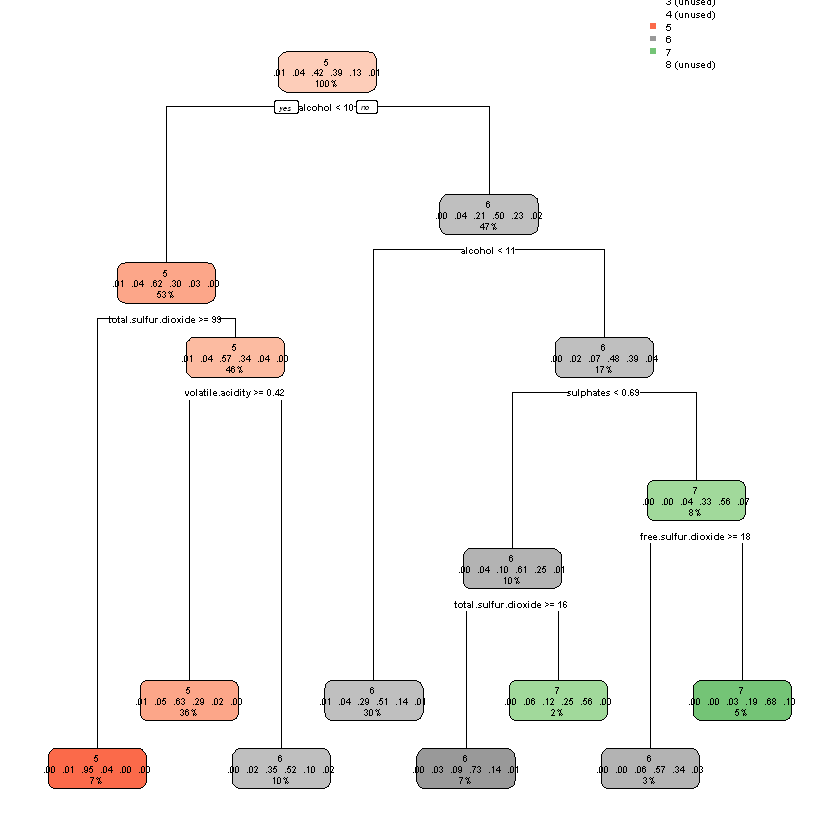

In [9]:
# visualize the decision tree for red wine
rpart.plot(redfit)

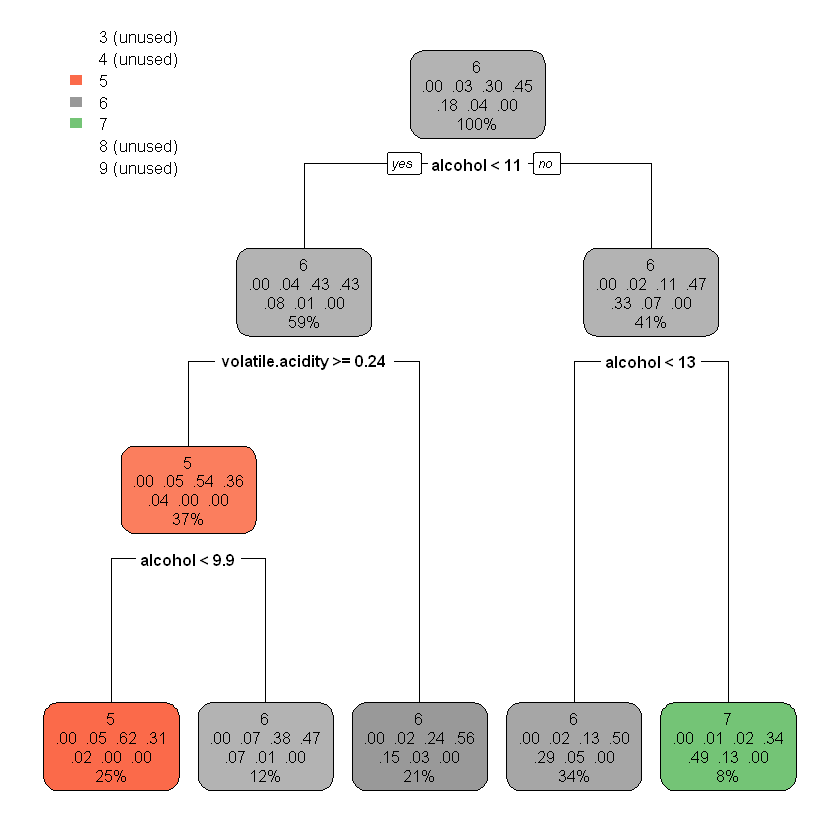

In [10]:
# visualize the decision tree for white wine
rpart.plot(whitefit)

Both trees use alcohol and free sulfur dioxide as the decision variables. The red wine selects sulphates, fixed acidity, and total sulfur dioxide as additional decision variables. The white wine selects volatile acidity as additional variables. The decision tree for red wine is deeper and has more nodes than that for the white wine.

In [11]:
# test prediction on red wine
redpred <- predict(redfit, redqualityTest[1:(length(redqualityTest)-1)])
redpred <- apply(redpred, 1, which.max) + 2
redpred <- factor(redpred, levels = levels(redqualityTest$quality))
# confusion matrix
confusionMatrix(redpred, redqualityTest$quality)

Confusion Matrix and Statistics

          Reference
Prediction  3  4  5  6  7  8
         3  0  0  0  0  0  0
         4  0  0  0  0  0  0
         5  1  3 82 42  3  0
         6  0  2 55 79 23  3
         7  0  0  0 13 11  2
         8  0  0  0  0  0  0

Overall Statistics
                                          
               Accuracy : 0.5392          
                 95% CI : (0.4828, 0.5949)
    No Information Rate : 0.4295          
    P-Value [Acc > NIR] : 5.239e-05       
                                          
                  Kappa : 0.2331          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity          0.000000  0.00000   0.5985   0.5896  0.29730  0.00000
Specificity          1.000000  1.00000   0.7308   0.5514  0.94681  1.00000
Pos Pred Value            NaN      NaN   0.6260   0.4877  0.42308      NaN
Neg Pred Value

In [12]:
# test prediction on white wine
whitepred <- predict(whitefit, whitequalityTest[1:(length(whitequalityTest)-1)])
whitepred <- apply(whitepred, 1, which.max) + 2
whitepred <- factor(whitepred, levels = levels(whitequalityTest$quality))
# confusion matrix
confusionMatrix(whitepred, whitequalityTest$quality)

Confusion Matrix and Statistics

          Reference
Prediction   3   4   5   6   7   8   9
         3   0   0   0   0   0   0   0
         4   0   0   0   0   0   0   0
         5   2  13 133  78   7   0   0
         6   5  20 153 340 138  28   1
         7   0   0   2  20  29   8   1
         8   0   0   0   0   0   0   0
         9   0   0   0   0   0   0   0

Overall Statistics
                                         
               Accuracy : 0.5133         
                 95% CI : (0.4815, 0.545)
    No Information Rate : 0.4479         
    P-Value [Acc > NIR] : 2.338e-05      
                                         
                  Kappa : 0.1959         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity          0.000000  0.00000   0.4618   0.7763  0.16667  0.00000
Specificity          1.000000  1.00000   0.8551   0.3611  0.9614

##### Predict with Random Forest

In [17]:
# random forest fit on red wine
red.rf <- randomForest(quality ~ ., data=redqualityTrain, importance=TRUE, proximity=TRUE)
# test prediction on red wine
redpred <- predict(red.rf, redqualityTest[1:(length(redqualityTest)-1)])
# confusion matrix
confusionMatrix(redpred, redqualityTest$quality)

Confusion Matrix and Statistics

          Reference
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   0   1   0   0
         5   1   5 115  29   3   0
         6   0   0  22  95  11   5
         7   0   0   0   9  23   0
         8   0   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.7304          
                 95% CI : (0.6781, 0.7783)
    No Information Rate : 0.4295          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.556           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity          0.000000 0.000000   0.8394   0.7090   0.6216  0.00000
Specificity          1.000000 0.996815   0.7912   0.7946   0.9681  1.00000
Pos Pred Value            NaN 0.000000   0.7516

In [18]:
# random forest fit on white wine
white.rf <- randomForest(quality ~ ., data=whitequalityTrain, importance=TRUE, proximity=TRUE)
# test prediction on red wine
whitepred <- predict(white.rf, whitequalityTest[1:(length(whitequalityTest)-1)])
# confusion matrix
confusionMatrix(whitepred, whitequalityTest$quality)

Confusion Matrix and Statistics

          Reference
Prediction   3   4   5   6   7   8   9
         3   0   0   0   0   0   0   0
         4   0   4   2   1   0   0   0
         5   4  17 183  60   2   0   0
         6   3  12  98 359  69   8   0
         7   0   0   5  18 103  12   2
         8   0   0   0   0   0  16   0
         9   0   0   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.68            
                 95% CI : (0.6497, 0.7091)
    No Information Rate : 0.4479          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5016          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity          0.000000 0.121212   0.6354   0.8196   0.5920  0.44444
Specificity          1.000000 0.996825   0.8797   0.648

The testing accuracy for red and white wine is 0.7304 and 0.68 respectively, higher than that for the single tree.